<a href="https://colab.research.google.com/github/AIAerospace/DeepLearning/blob/main/8-CNN/ANNmultimodal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANN multimodal**  


Queremos entrenar un modelo con imagenes y datos estructurados


In [28]:
import numpy as np
import matplotlib.pyplot as plt



%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## **2 - Conjunto de Datos**  

Loads the CIFAR10 dataset.

This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. See more info at the [CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).

The classes are:



| Label | Description |medio|humano|
|-------|-------------|-----|------|
| 0     | airplane    | 0   |  1   |
| 1     | automobile  | 1   |  1   |
| 2     | bird        | 0   |  0   |
| 3     | cat         | 1   |  0   |
| 4     | deer        | 1   |  0   |
| 5     | dog         | 1   |  0   |
| 6     | frog        | 2   |  0   |
| 7     | horse       | 1   |  0   |
| 8     | ship        | 2   |  1   |
| 9     | truck       | 1   |  1   |

In [29]:

import keras
from keras.utils import to_categorical

(x_train, y_train_0), (x_test, y_test_0) = keras.datasets.cifar10.load_data()

# Normalizar las imágenes (valores entre 0 y 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir las etiquetas a one-hot encoding
y_train = to_categorical(y_train_0, 10)
y_test = to_categorical(y_test_0, 10)



In [43]:
datos_train = np.zeros((y_train.shape[0], 2))
datos_test = np.zeros((y_test.shape[0], 2))

datos_train[:, 0:1] = np.where(np.isin(y_train_0, [6, 8]), 2, np.where(np.isin(y_train_0, [1,3,4,5,7,9]), 1, 0))
datos_test[:, 0:1] =  np.where(np.isin(y_test_0, [6, 8]),  2, np.where(np.isin(y_test_0, [1,3,4,5,7,9]), 1, 0))

datos_train[:, 1:2] = np.where(np.isin(y_train_0, [0,1,8,9]), 1, 0)
datos_test[:, 1:2] = np.where(np.isin(y_test_0, [0,1,8,9]), 1, 0)


In [31]:
print(x_train.shape)
print(datos_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 2)
(50000, 10)


# Modelo CNN como baseline

In [44]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input

# Definir el modelo
model = Sequential()

# Primera capa de convolución
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Segunda capa de convolución
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Tercera capa de convolución
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Aplanar las salidas de las capas de convolución
model.add(Flatten())

# Capa completamente conectada
model.add(Dense(64, activation='relu'))


# Capa de salida
model.add(Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 13, 13, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 437,066 (1.67 MB)

 Trainable params: 437,066 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=12, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3226 - loss: 1.8160 - val_accuracy: 0.5484 - val_loss: 1.2579
Epoch 2/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5642 - loss: 1.2199 - val_accuracy: 0.6555 - val_loss: 0.9923
Epoch 3/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6373 - loss: 1.0384 - val_accuracy: 0.6880 - val_loss: 0.8953
Epoch 4/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6765 - loss: 0.9316 - val_accuracy: 0.6870 - val_loss: 0.9229
Epoch 5/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7004 - loss: 0.8539 - val_accuracy: 0.7175 - val_loss: 0.8256
Epoch 6/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7210 - loss: 0.7968 - val_accuracy: 0.7305 - val_loss: 0.7839
Epoch 7/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7369 - loss: 0.7577 - val_accuracy: 0.7439 - val_loss: 0.7428
Epoch 8/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7531 - loss: 0.7027 - val_accuracy: 0

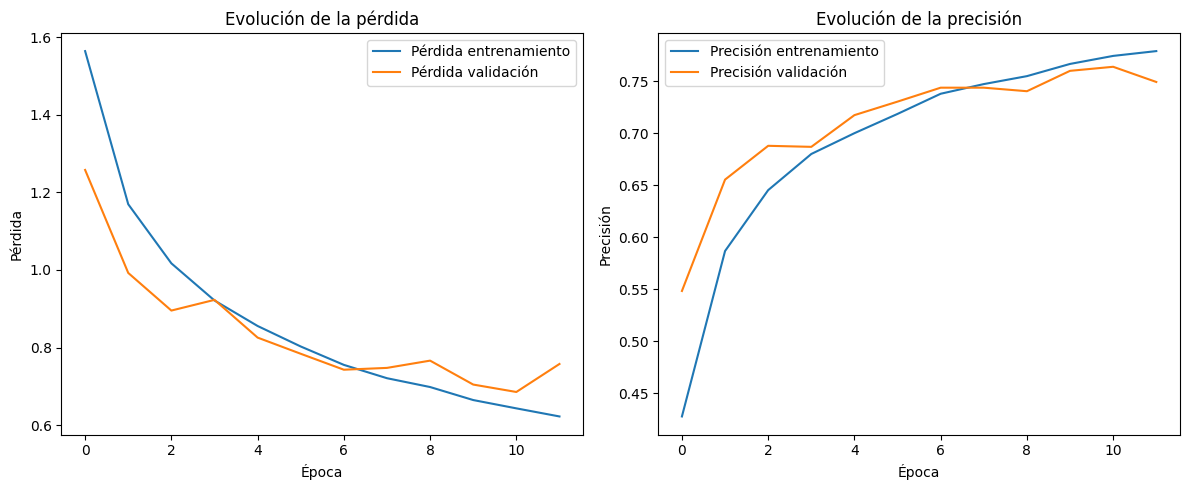

In [46]:
# Dibuja las curvas de entrenamiento y validación (pérdida y precisión)
plt.figure(figsize=(12, 5))

# Curva de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Evolución de la pérdida')
plt.legend()

# Curva de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Evolución de la precisión')
plt.legend()

plt.tight_layout()
plt.show()

# Modelo multimodal

In [35]:
# Definir el modelo
imagen = Sequential()

# Primera capa de convolución
imagen.add(Input(shape=(32, 32, 3)))
imagen.add(Conv2D(64, (3, 3), activation='relu'))
imagen.add(MaxPooling2D((2, 2)))
imagen.add(Dropout(0.25))

# Segunda capa de convolución
imagen.add(Conv2D(128, (3, 3), activation='relu'))
imagen.add(MaxPooling2D((2, 2)))
imagen.add(Dropout(0.25))

# Tercera capa de convolución
imagen.add(Conv2D(256, (3, 3), activation='relu'))
imagen.add(MaxPooling2D((2, 2)))
imagen.add(Dropout(0.25))

# Aplanar las salidas de las capas de convolución
imagen.add(Flatten())

# Compilar el modelo
imagen.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
imagen.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 13, 13, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1024)                │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 370,816 (1.41 MB)

 Trainable params: 370,816 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
metadatos = Sequential()
metadatos.add(Input(shape=(2,)))
metadatos.add(Dense(64, activation='relu'))
#metadatos.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
metadatos.summary()




Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 64)                  │             192 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 192 (768.00 B)

 Trainable params: 192 (768.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
from keras.models import Model
# Get the output tensors of both models
output1 = imagen.layers[-1].output  # output before the flatten layer
output2 = metadatos.layers[-1].output  # output before the flatten layer

# Concatenate the outputs
merged = Concatenate()([output1, output2])

# Add some dense layers
merged = Dense(128, activation='relu')(merged)
merged = Dense(64, activation='relu')(merged)
merged = Dense(10, activation='softmax')(merged)

# Create a new model
new_model = Model(inputs=[imagen.input, metadatos.input], outputs=merged)

NameError: name 'Concatenate' is not defined

In [ ]:
from keras.layers import Concatenate
multimodal = Sequential()
multimodal.add(Concatenate([imagen, metadatos]))
multimodal.add(Dense(128,activation='relu'))
multimodal.add(Dense(10,activation='softmax'))
#multimodal.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
multimodal.summary()




In [ ]:
multimodal.fit([x_train, datos_train], y_train, epochs=12, batch_size=64, validation_data=([x_test, datos_test], y_test))

In [47]:
from keras.models import Model
from keras.layers import Input, Dense, concatenate, Conv2D, MaxPooling2D, Flatten
from keras.utils import plot_model

imagen_input=Input(shape=(32, 32, 3), name='Left_input')
conv1 = Conv2D(64, (3, 3), activation='relu')(imagen_input)
max1 = MaxPooling2D((2, 2))(conv1)
conv2 = Conv2D(128, (3, 3), activation='relu')(max1)
max2 = MaxPooling2D((2, 2))(conv2)
conv3 = Conv2D(256, (3, 3), activation='relu')(max2)
max3 = MaxPooling2D((2, 2))(conv3)
imagen_output = Flatten()(max3)

metadatos_input=Input(shape=(2,), name='Right_input')
meta_output = Dense(64, activation='relu')(metadatos_input)

concat = concatenate([imagen_output, meta_output], name='Concatenate')
final_model_output = Dense(10, activation='softmax')(concat)

final_model = Model(inputs=[imagen_input, metadatos_input], outputs=final_model_output, name='Final_output')
final_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])



# To train
#final_model.fit([Left_data,Right_data], labels, epochs=10, batch_size=32)

In [48]:
historia = final_model.fit([x_train,datos_train], y_train, epochs=10, batch_size=32,validation_data=([x_test,datos_test], y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6104 - loss: 1.1118 - val_accuracy: 0.8089 - val_loss: 0.4571
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8249 - loss: 0.4253 - val_accuracy: 0.8307 - val_loss: 0.4125
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8603 - loss: 0.3504 - val_accuracy: 0.8595 - val_loss: 0.3556
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8820 - loss: 0.3051 - val_accuracy: 0.8471 - val_loss: 0.3795
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8979 - loss: 0.2595 - val_accuracy: 0.8646 - val_loss: 0.3505
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9138 - loss: 0.2217 - val_accuracy: 0.8702 - val_loss: 0.3423
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9303 - loss: 0.1841 - val_accuracy: 0.8671 - val_loss: 0.3671
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9437 - loss: 0.1510 - 

In [49]:
# prompt: evalua final_model en el conjunto de test

# Evaluate the final_model on the test set
loss, accuracy = final_model.evaluate([x_test, datos_test], y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Test Loss: 0.4556
Test Accuracy: 0.8644


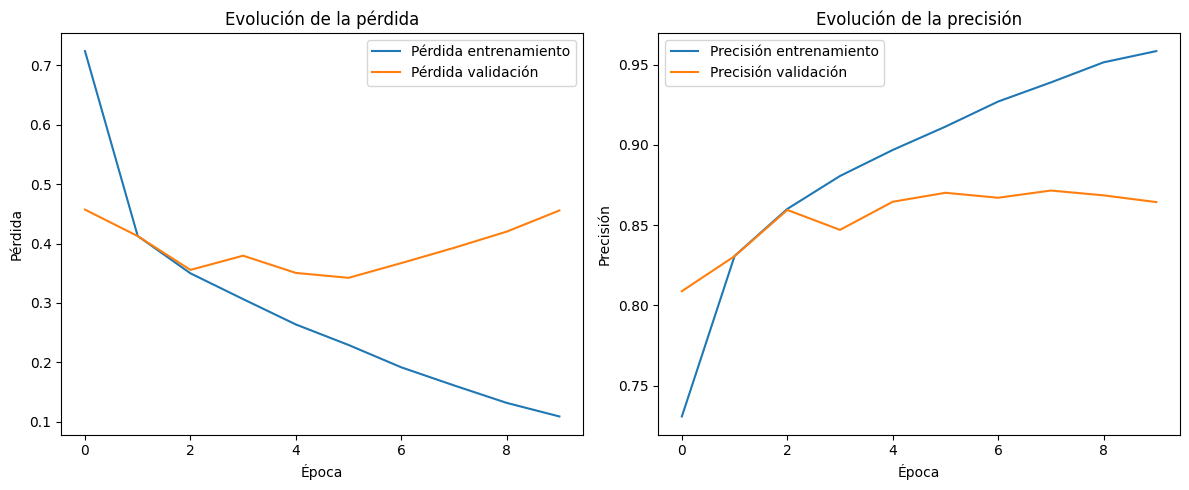

In [50]:
# prompt: dibuja las curvas de entrenamiento

import matplotlib.pyplot as plt
# Dibuja las curvas de entrenamiento y validación (pérdida y precisión)
plt.figure(figsize=(12, 5))

# Curva de pérdida
plt.subplot(1, 2, 1)
plt.plot(historia.history['loss'], label='Pérdida entrenamiento')
plt.plot(historia.history['val_loss'], label='Pérdida validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Evolución de la pérdida')
plt.legend()

# Curva de precisión
plt.subplot(1, 2, 2)
plt.plot(historia.history['accuracy'], label='Precisión entrenamiento')
plt.plot(historia.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Evolución de la precisión')
plt.legend()

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


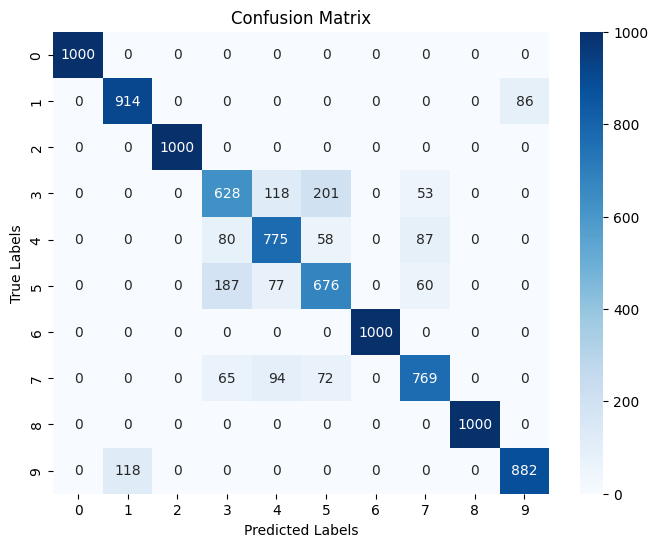

In [51]:
# prompt: dibuja la matriz de confusion

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the labels for the test set
y_pred = final_model.predict([x_test, datos_test])
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


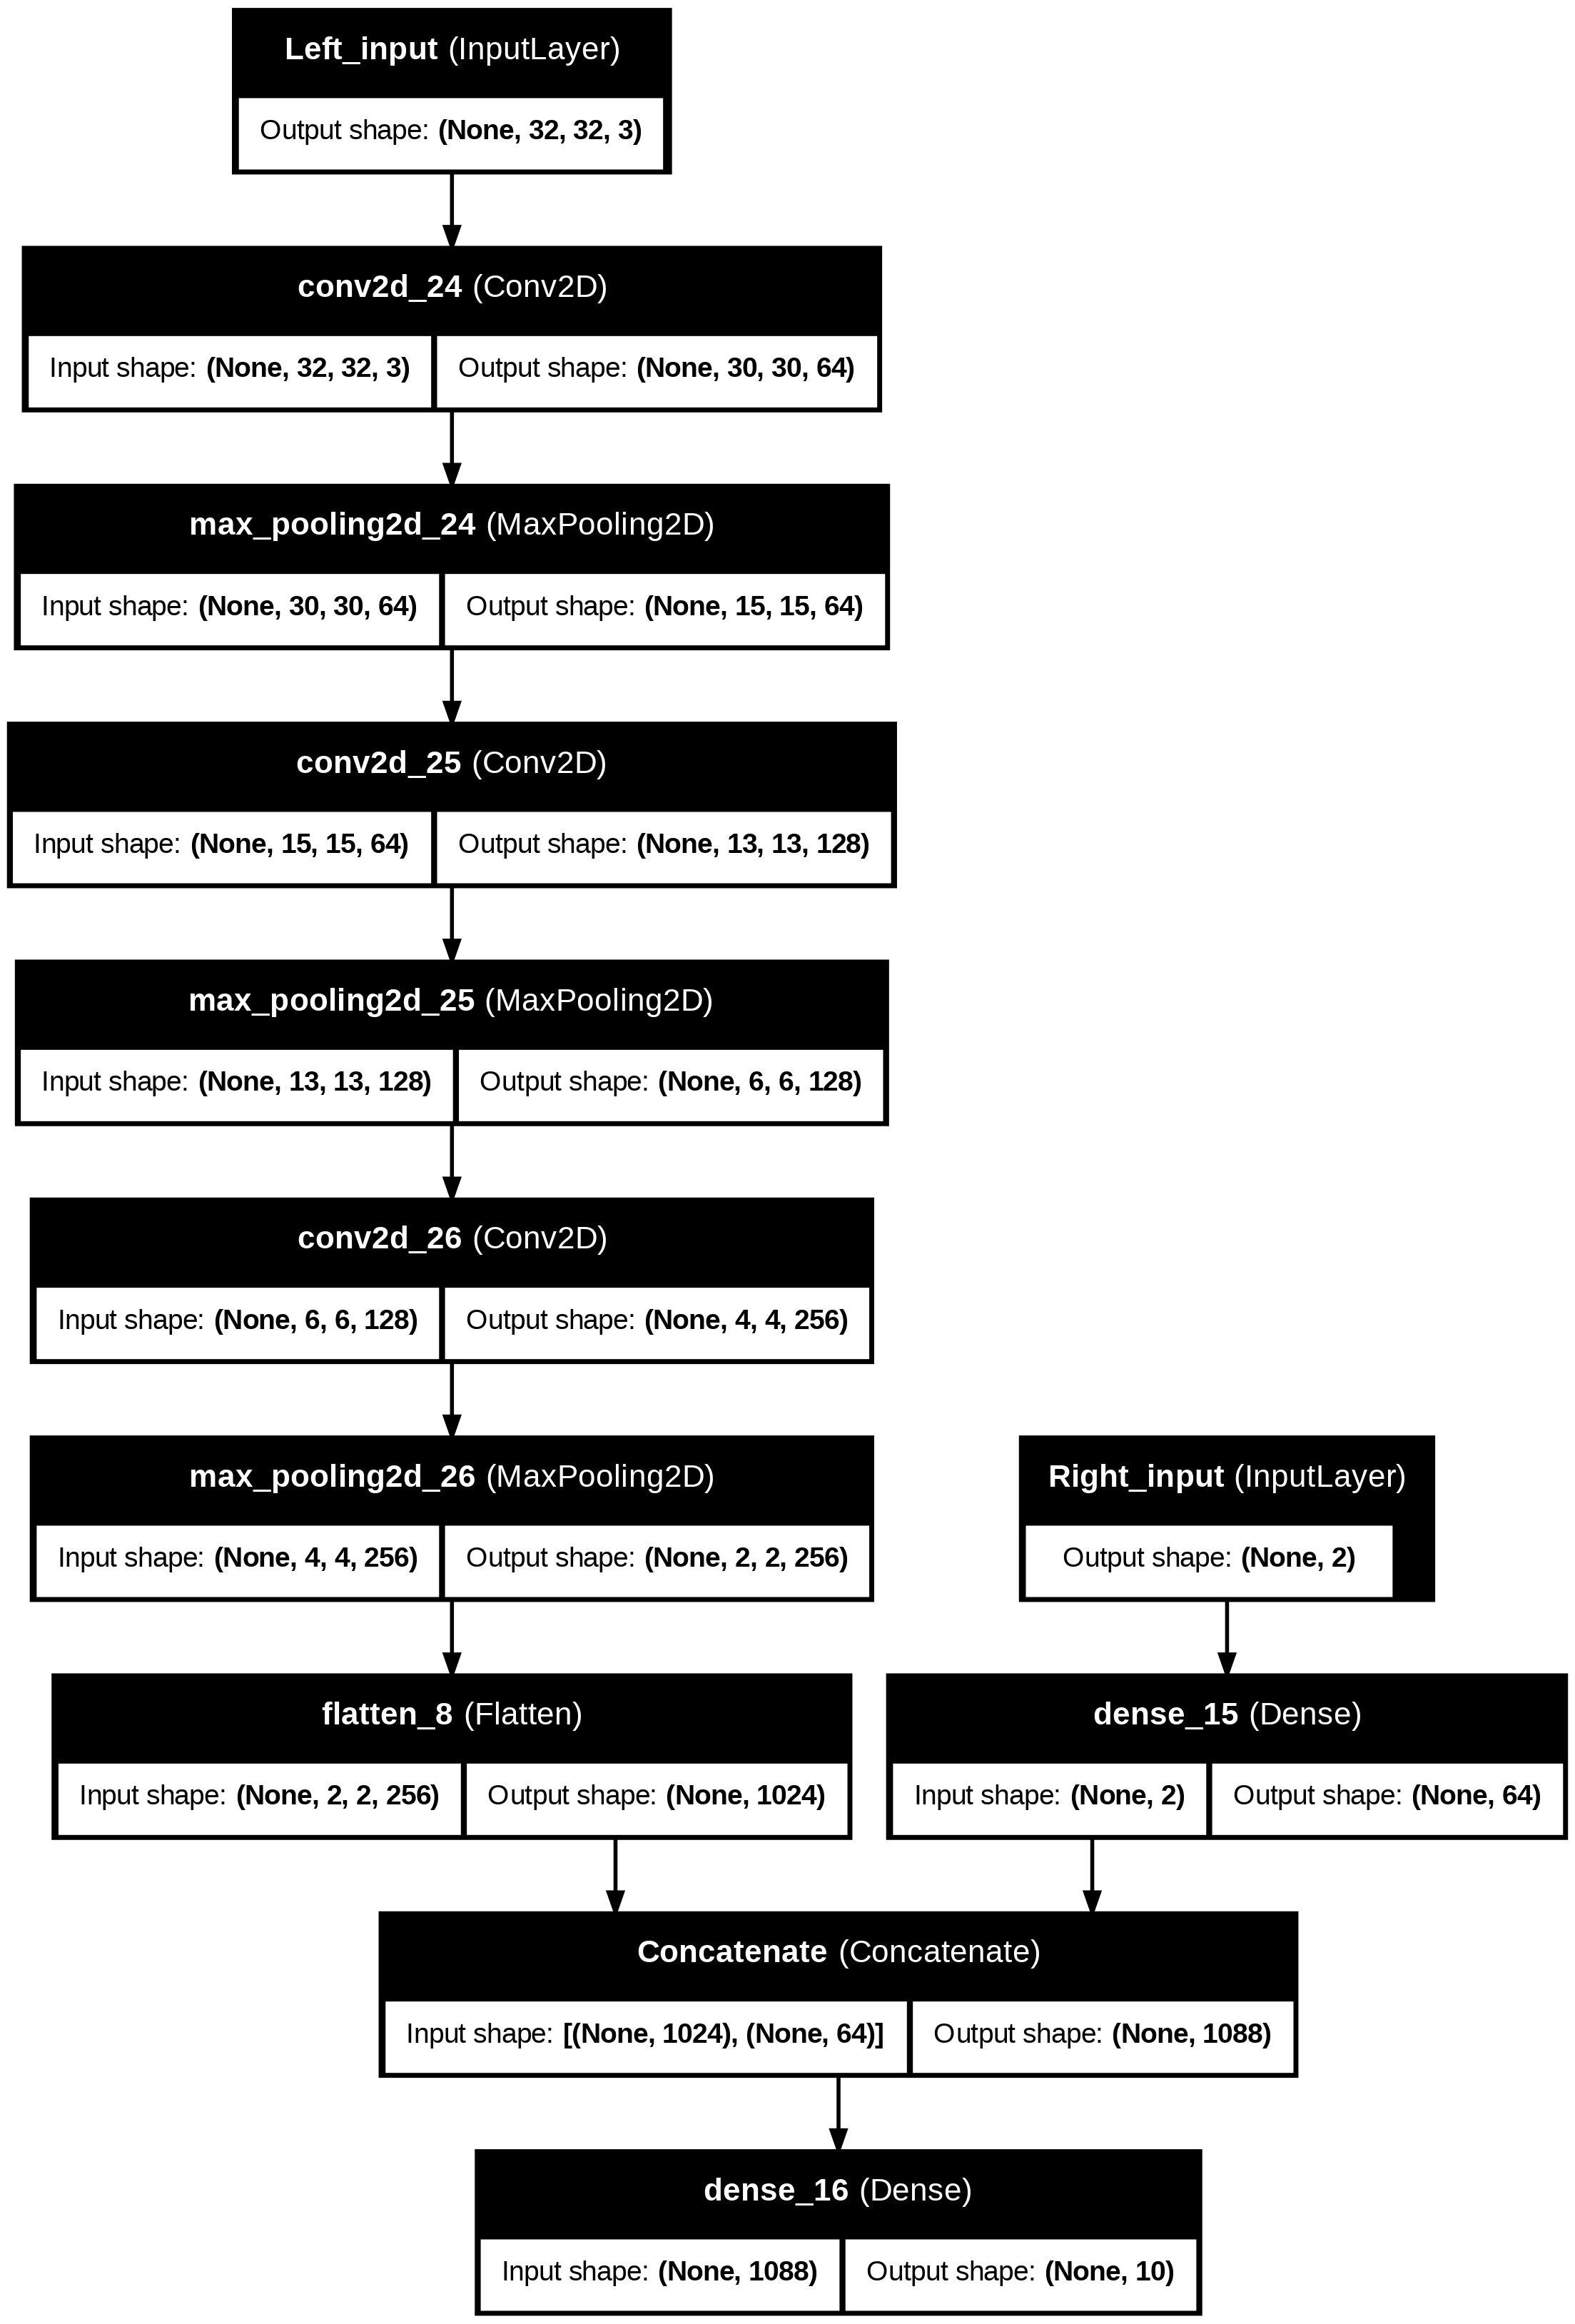

In [53]:
from keras.utils import plot_model

plot_model(final_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)